Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/thread_ring/2/'

N = 100_000
R = 2_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}8/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}8/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}8/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}8/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 20:28:10 2025 +0200) (509.09ms elap...,0.1900,0.0000,0.361,0.68,0.03,2.36,65.84 C,Nominal
1,(Sat Apr 5 20:28:11 2025 +0200) (509.02ms elap...,1.4800,0.0396,0.442,1.99,0.46,40.97,65.84 C,Nominal
2,(Sat Apr 5 20:28:11 2025 +0200) (509.19ms elap...,0.0571,0.0000,0.259,0.23,0.03,2.30,65.47 C,Nominal
3,(Sat Apr 5 20:28:12 2025 +0200) (508.76ms elap...,2.0700,0.0248,0.459,2.50,0.35,23.45,65.47 C,Nominal
4,(Sat Apr 5 20:28:12 2025 +0200) (508.05ms elap...,4.1600,0.0000,0.386,4.70,0.79,69.35,65.05 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(10548, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 5 20:28:22 2025 +0200) (1008.93ms ela...,37.7,0.0122,1.290,39.90,3.96,99.29,65.87 C,Nominal
1,(Sat Apr 5 20:28:23 2025 +0200) (1004.44ms ela...,36.5,0.0000,0.614,39.17,3.80,97.92,68.29 C,Nominal
2,(Sat Apr 5 20:28:24 2025 +0200) (1003.92ms ela...,34.8,0.0000,0.652,37.45,3.88,98.92,70.20 C,Nominal
3,(Sat Apr 5 20:28:25 2025 +0200) (1004.05ms ela...,36.7,0.0000,0.562,39.28,3.85,98.31,72.10 C,Nominal
4,(Sat Apr 5 20:28:26 2025 +0200) (1004.05ms ela...,36.8,0.0000,0.561,39.42,3.86,99.26,73.75 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 02:06:44 2025 +0200) (511.24ms elap...,0.1160,0.0000,0.262,0.23,0.05,3.91,35.99 C,Nominal
1,(Sun Apr 6 02:06:45 2025 +0200) (508.25ms elap...,1.0900,0.0341,0.365,1.48,0.22,18.50,36.11 C,Nominal
2,(Sun Apr 6 02:06:45 2025 +0200) (507.25ms elap...,0.1180,0.0000,0.260,0.28,0.07,4.34,36.11 C,Nominal
3,(Sun Apr 6 02:06:46 2025 +0200) (509.70ms elap...,3.4500,0.0533,0.466,3.94,0.52,32.69,36.20 C,Nominal
4,(Sun Apr 6 02:06:46 2025 +0200) (508.58ms elap...,0.0529,0.0000,0.258,0.21,0.04,2.73,36.20 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(14322, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 02:06:56 2025 +0200) (1010.12ms ela...,11.50,0.0000,0.966,12.38,1.37,98.88,37.27 C,Nominal
1,(Sun Apr 6 02:06:57 2025 +0200) (1006.16ms ela...,9.51,0.0000,1.310,10.61,1.01,99.64,39.68 C,Nominal
2,(Sun Apr 6 02:06:58 2025 +0200) (1006.55ms ela...,10.20,0.0000,0.961,11.10,1.20,98.96,41.89 C,Nominal
3,(Sun Apr 6 02:06:59 2025 +0200) (1006.97ms ela...,10.70,0.0000,0.830,11.56,1.42,90.21,43.05 C,Nominal
4,(Sun Apr 6 02:07:00 2025 +0200) (1006.50ms ela...,9.33,0.0169,1.130,10.34,1.03,99.40,43.75 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 20:28:10,0.1900,0.0000,0.361,0.68,0.03,2.36,65.84,Nominal,509.09
1,2025-04-05 20:28:11,1.4800,0.0396,0.442,1.99,0.46,40.97,65.84,Nominal,509.02
2,2025-04-05 20:28:11,0.0571,0.0000,0.259,0.23,0.03,2.30,65.47,Nominal,509.19
3,2025-04-05 20:28:12,2.0700,0.0248,0.459,2.50,0.35,23.45,65.47,Nominal,508.76
4,2025-04-05 20:28:12,4.1600,0.0000,0.386,4.70,0.79,69.35,65.05,Nominal,508.05


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(10548, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-05 20:28:22,37.7,0.0122,1.290,39.90,3.96,99.29,65.87,Nominal,1008.93
1,2025-04-05 20:28:23,36.5,0.0000,0.614,39.17,3.80,97.92,68.29,Nominal,1004.44
2,2025-04-05 20:28:24,34.8,0.0000,0.652,37.45,3.88,98.92,70.20,Nominal,1003.92
3,2025-04-05 20:28:25,36.7,0.0000,0.562,39.28,3.85,98.31,72.10,Nominal,1004.05
4,2025-04-05 20:28:26,36.8,0.0000,0.561,39.42,3.86,99.26,73.75,Nominal,1004.05


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 02:06:44,0.1160,0.0000,0.262,0.23,0.05,3.91,35.99,Nominal,511.24
1,2025-04-06 02:06:45,1.0900,0.0341,0.365,1.48,0.22,18.50,36.11,Nominal,508.25
2,2025-04-06 02:06:45,0.1180,0.0000,0.260,0.28,0.07,4.34,36.11,Nominal,507.25
3,2025-04-06 02:06:46,3.4500,0.0533,0.466,3.94,0.52,32.69,36.20,Nominal,509.70
4,2025-04-06 02:06:46,0.0529,0.0000,0.258,0.21,0.04,2.73,36.20,Nominal,508.58


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(14322, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 02:06:56,11.50,0.0000,0.966,12.38,1.37,98.88,37.27,Nominal,1010.12
1,2025-04-06 02:06:57,9.51,0.0000,1.310,10.61,1.01,99.64,39.68,Nominal,1006.16
2,2025-04-06 02:06:58,10.20,0.0000,0.961,11.10,1.20,98.96,41.89,Nominal,1006.55
3,2025-04-06 02:06:59,10.70,0.0000,0.830,11.56,1.42,90.21,43.05,Nominal,1006.97
4,2025-04-06 02:07:00,9.33,0.0169,1.130,10.34,1.03,99.40,43.75,Nominal,1006.50


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


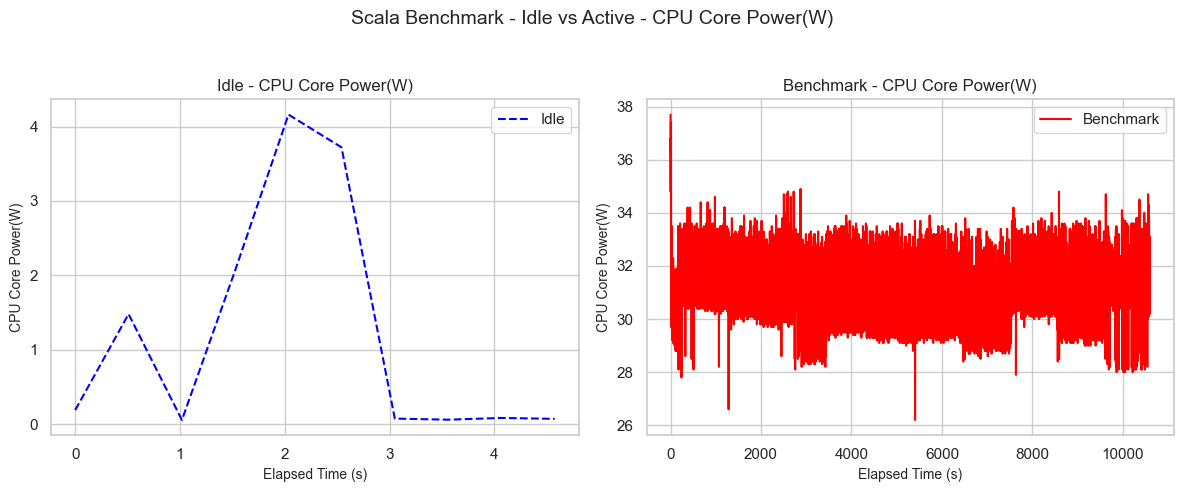

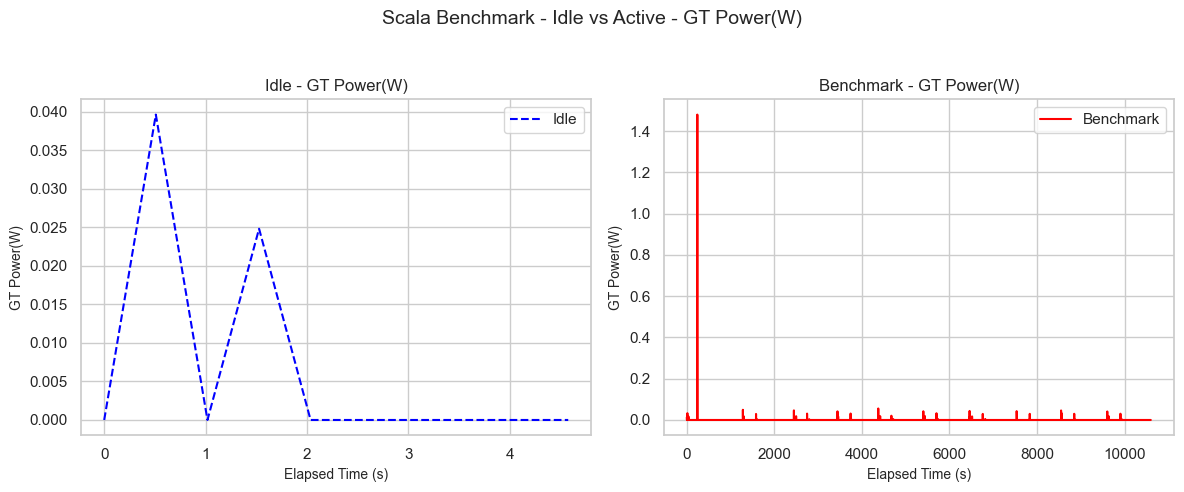

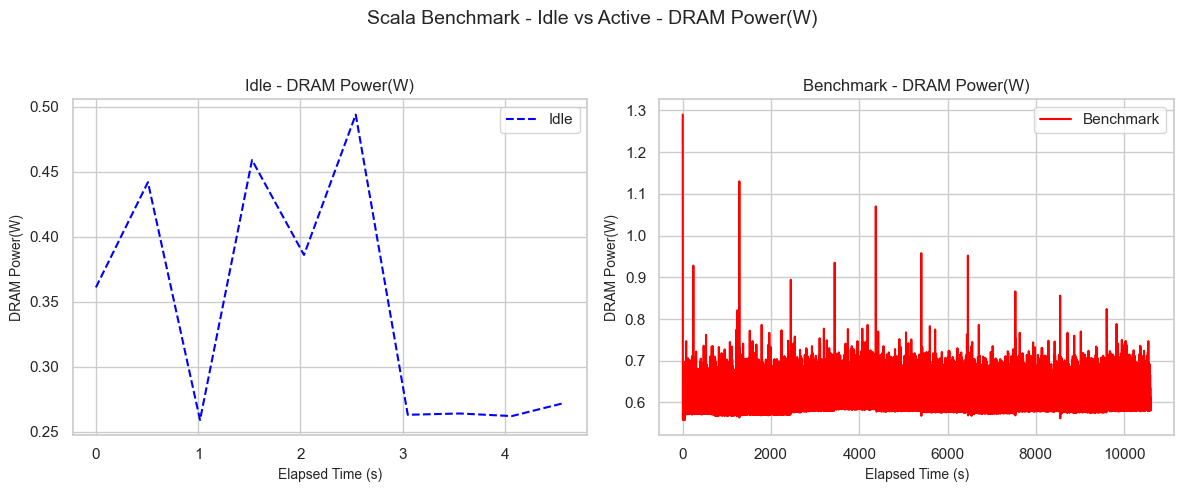

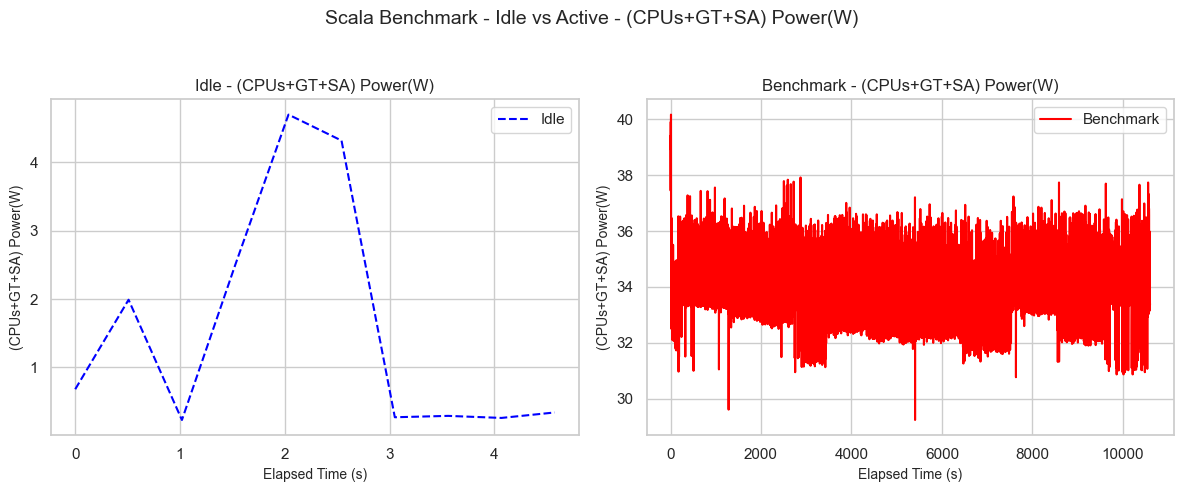

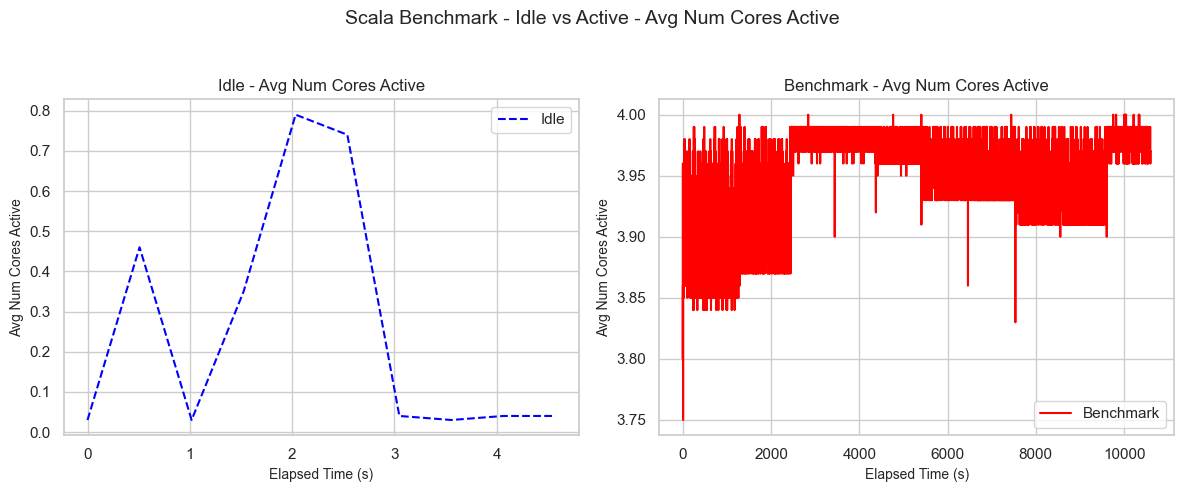

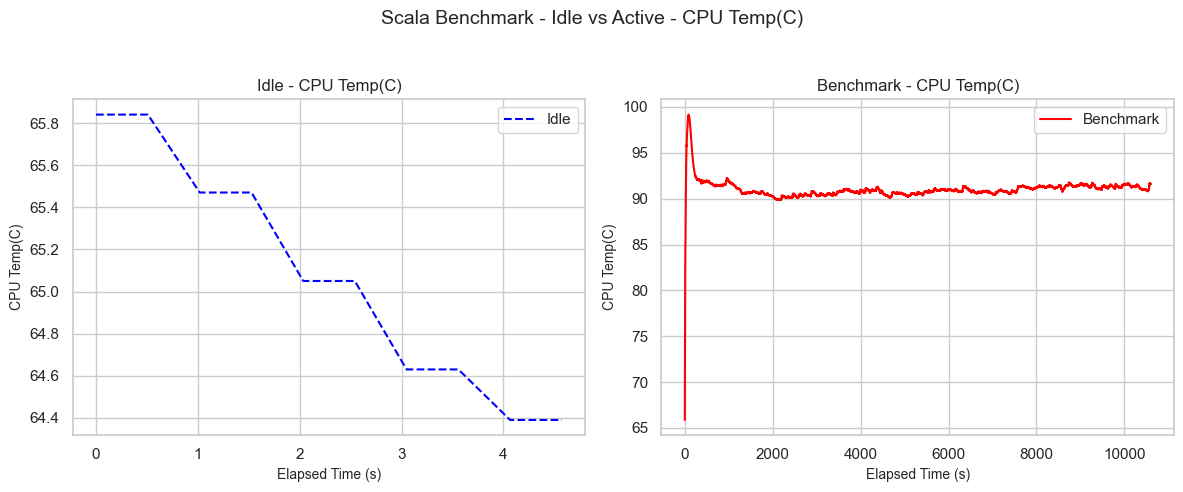

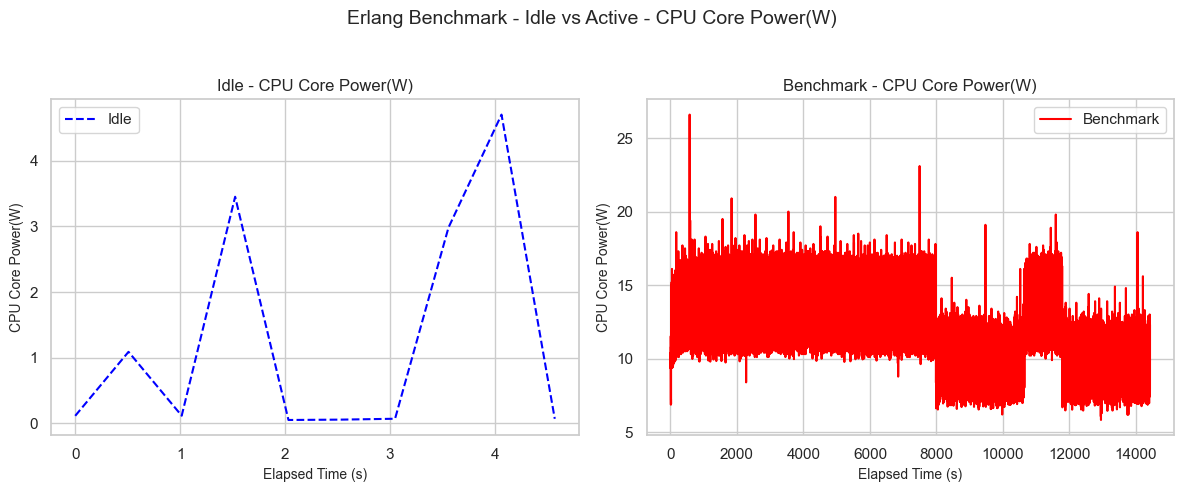

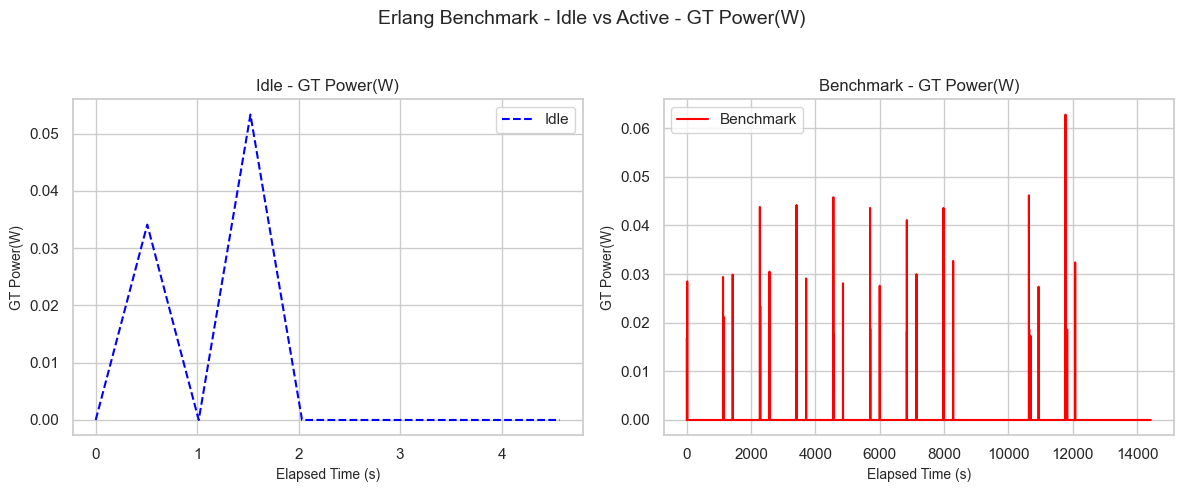

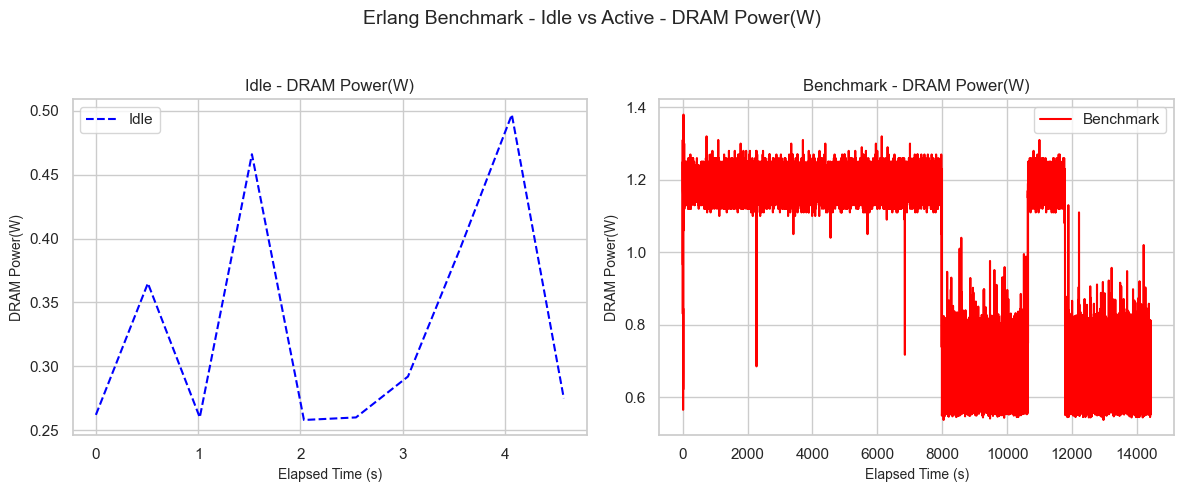

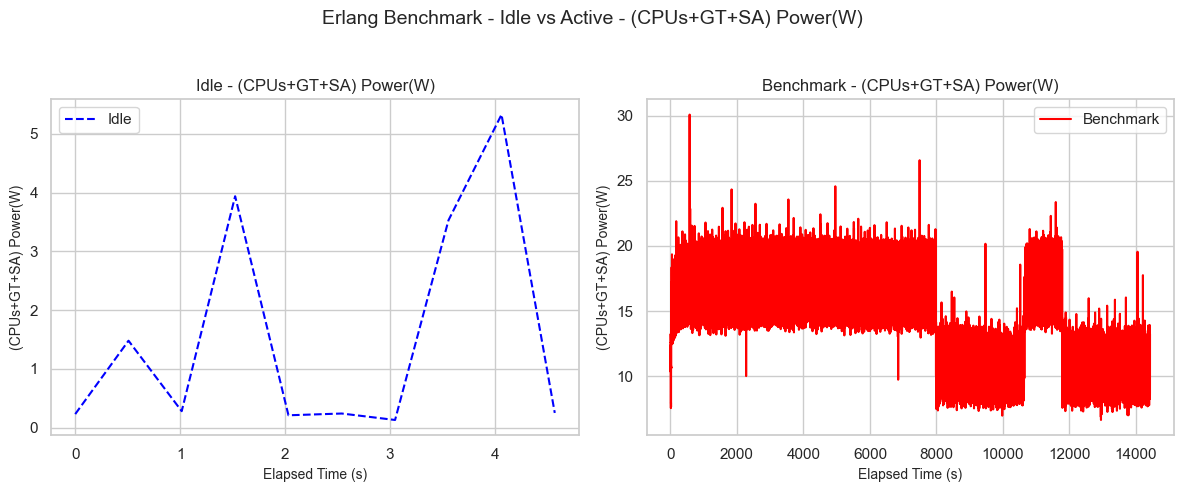

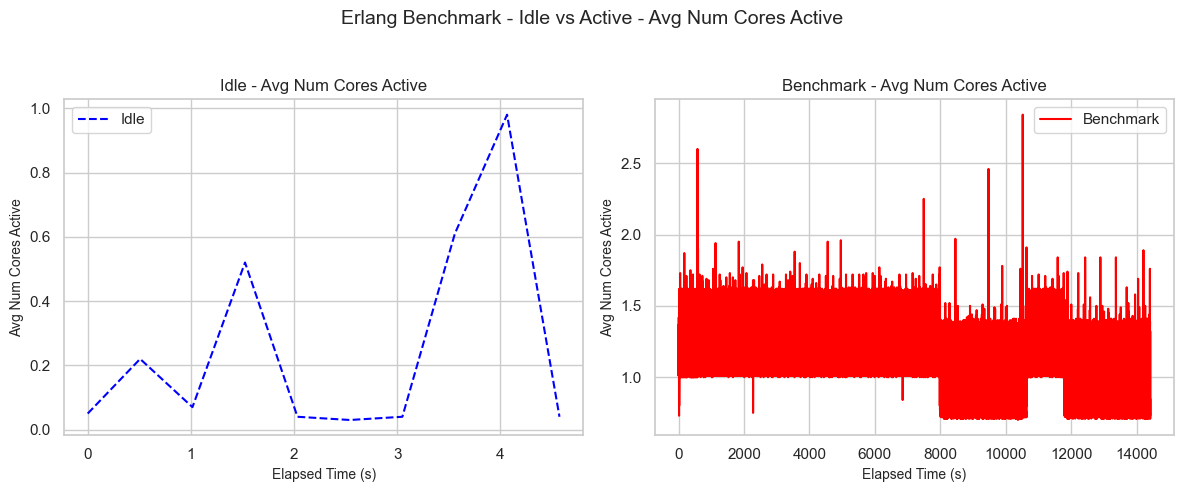

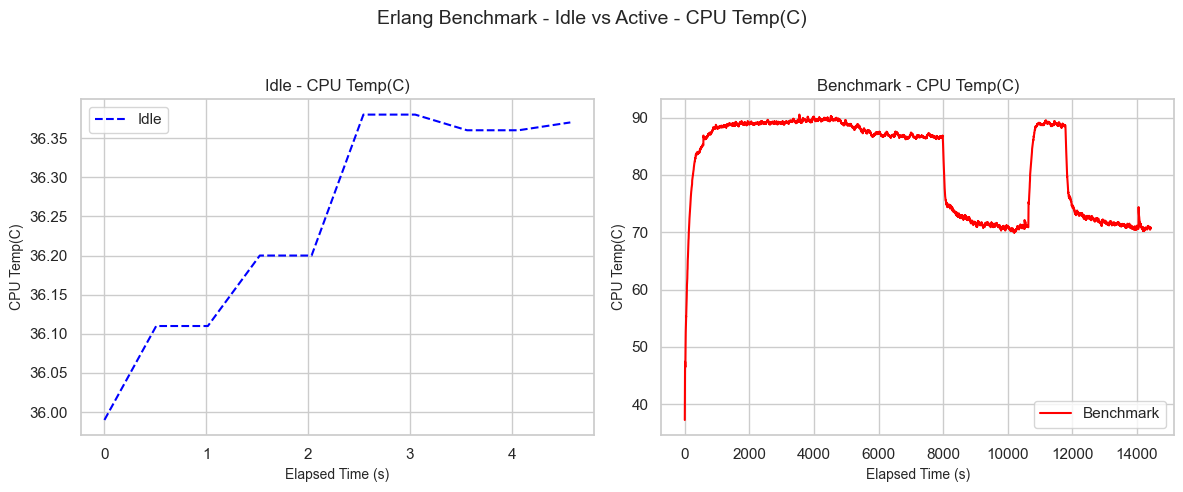

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

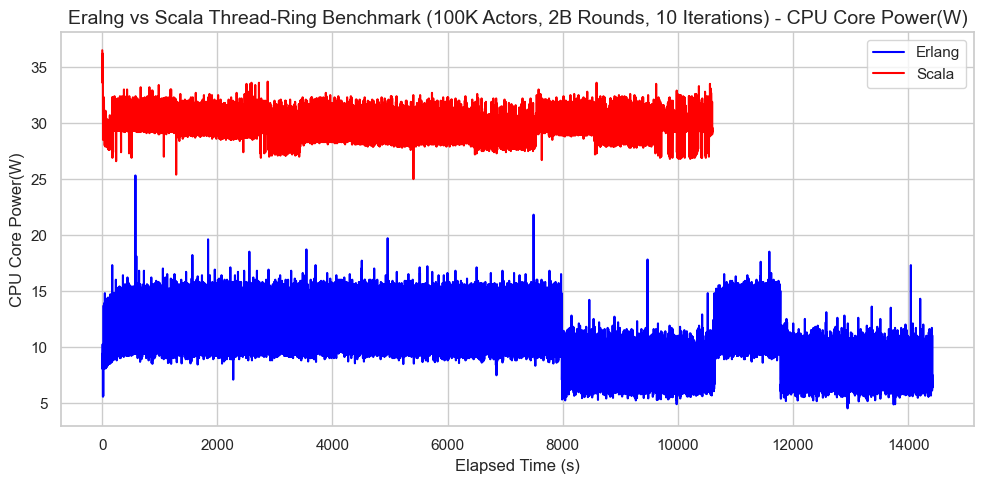

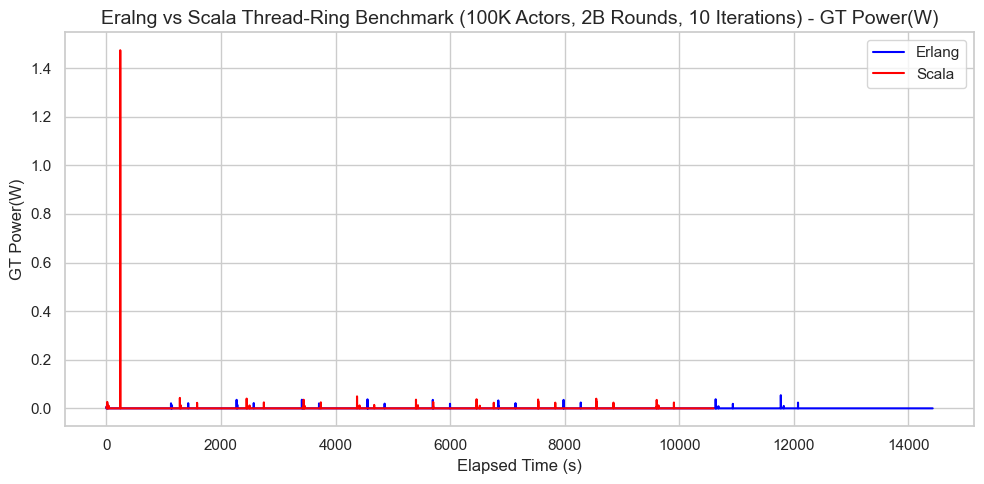

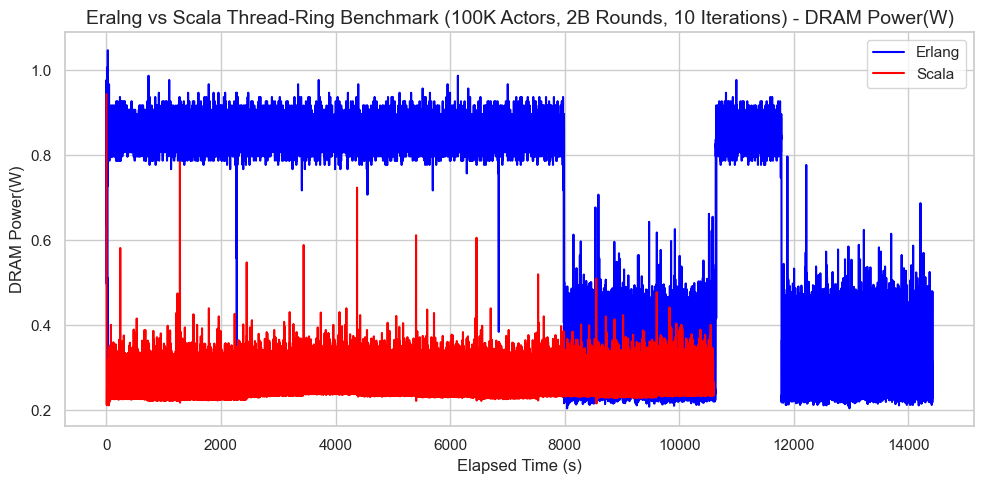

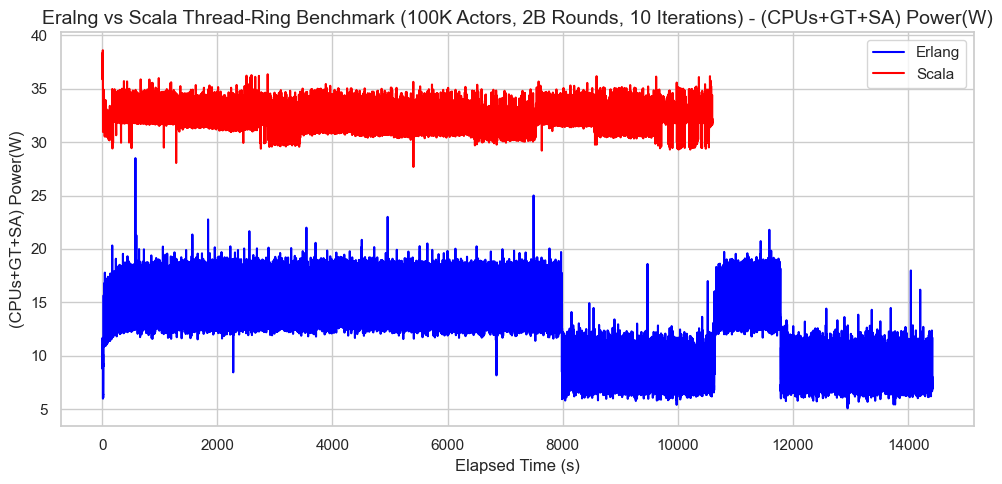

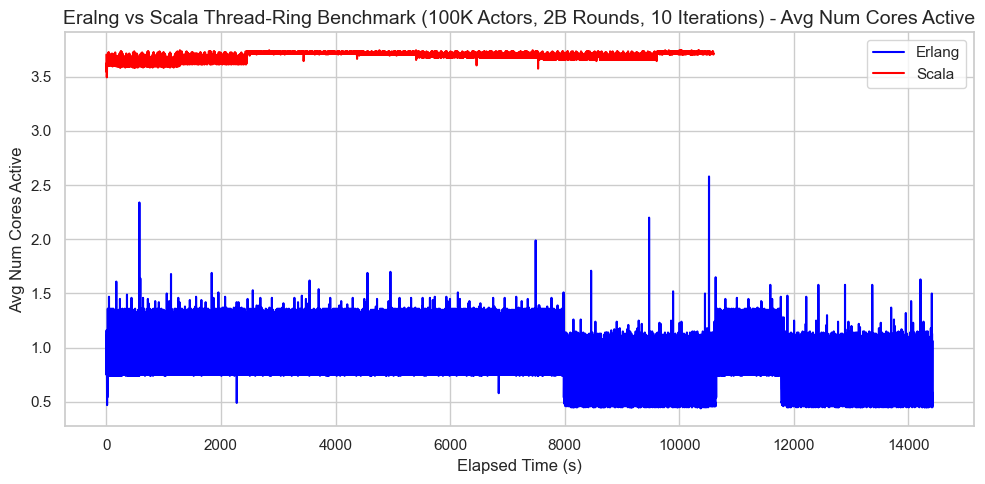

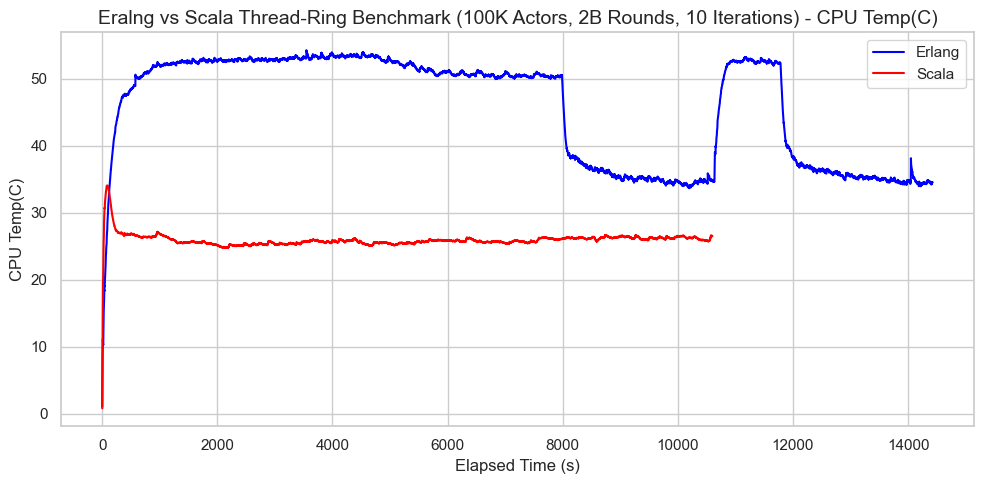

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.788834
GT Power(W)              -0.006090
DRAM Power(W)             0.253847
(CPUs+GT+SA) Power(W)    32.346425
CPU Temp(C)              25.941486
Avg Num Cores Active      3.684052
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)         9.180158
GT Power(W)              -0.008666
DRAM Power(W)             0.630925
(CPUs+GT+SA) Power(W)    11.336556
CPU Temp(C)              45.611845
Avg Num Cores Active      0.728030
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 318487.727262749 Joules
Erlang Benchmark: 141523.5719539274 Joules
